### Plot Velocities
Read and visualize ice velocity grids 

In [1]:
import numpy as np
import pointAdvection
import pointCollection as pc
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2

### File locations

In [3]:
MOA_dir='/Volumes/ice3/tyler/MOA/'
# https://nsidc.org/data/NSIDC-0484
vel_dir='/Volumes/ice3/tyler/MEaSUREs/NSIDC-0484.002/'

#### Set bounds for Larsen C

In [4]:
# grid bounds to read
xlimits = (-2470000, -2050000)
ylimits = (895000, 1325000)


# read in the MOA, generate a color map

In [5]:
try:
    cmap = pointAdvection.tools.custom_colormap(180, 'Rignot')
except Exception:
    pass
# read in the MOA
MOA = pc.grid.data().from_geotif(MOA_dir+'moa125_2014_hp1_v01.tif',
    bounds=[xlimits,ylimits])[::4, ::4]

## Pick a location in the center of the map

In [6]:
xc, yc=[-2196826.298701299, 1150836.038961039]


### Read the velocity data

In [7]:
d2 = pointAdvection.advection().from_nc(vel_dir+'antarctica_ice_velocity_450m_v2.nc',
    bounds=[xlimits,ylimits])

In [8]:
# pick some points around the center point
dx, dy = np.meshgrid([-1.e4, 0, 1.e4], [-1.e4, 0, 1.e4])

d2.x=xc+dx.ravel()
d2.y=yc+dy.ravel()
d2.t=365.25*24*3600*(2015.0-2000)+np.zeros_like(dx).ravel()

### Move the points downstream


In [9]:
d2.translate_parcel(t0=365.25*24*3600*(2100.0-2000), streak=True, step=10)

### Plot the results

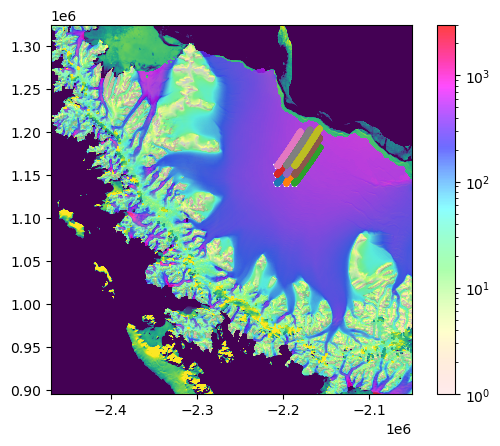

In [10]:
plt.figure(); 
MOA.show(clim=[14000, 17000])
plt.plot(d2.x, d2.y,'w*')
plt.imshow(np.abs(d2.grid.U+1j*d2.grid.V)*24*3600*365.25, extent=d2.grid.extent, origin='lower',\
          cmap=cmap, norm=colors.LogNorm(vmin=1, vmax=3000), alpha=0.75); plt.colorbar()
plt.plot(np.c_[d2.streak['x']], np.c_[d2.streak['y']], marker='.');